Hi Ferdinand. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. "Improve" comments mean that there are tiny corrections which could help you to make your project better. Every issue with our code is a chance for us to learn something new. Good luck!
    
## Review v. 2<a class="tocSkip">
    
Thank you for taking the time to correct your project! I really appreciate your hard work.  There's still a minor issue with these parts statistical tests and graph. Here are a few more pointers to help you put the final touches on your project. Keep working on it, you are improving!
    
## Review v. 3<a class="tocSkip">
    
 I'm happy to see you've made a few corrections to your work! There's still a minor issue with these parts conversion and statistical tests. Here are a few more pointers to help you put the final touches on your project. One more time and you'll have it!

<div class="alert alert-info"> <b>Student's comment v. 3: </b>I corrected the step of the cumulativeData.. The results didn't change</div>

## Review v. 4<a class="tocSkip">

Thank you for taking the time to correct your project! I really appreciate your hard work. There's still a minor issue with this part conversion. Here are a few more pointers to help you put the final touches on your project. Keep working, you've got this!

<div class="alert alert-info"> <b>Student's comment v. 4: </b>Thanks for the improvements and the tips. But please tell me the specific cells where I am making mistakes. Otherwise I won't get anywhere and we will be sending the project back and forth forever.</div>

## Review v. 5<a class="tocSkip">

Your corrections look great, you've improved your work significantly! I'm glad to say that your project has been accepted. Good luck!

# Project: Big Online Store

This project is about elaborating the most important hypothesis to increase the sales of an online store. Afterwards, an A/B test will be applied and the results will be analyzed.
At the beginning, the data is pre-processed, as there might be missing values, for example. In the next step, the most important hypotheses are worked out by means of the calculations of the ICE and RICE values. In the 3rd step, the A/B test is carried out, comparing different metrics, e.g. cumulative turnover or order size between the groups.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you described the project, but please add a goal of the project.
</div>

## Importing data and tools

### Tools

Folgende Tools werden im Projekt verwendet.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats

### Data

The following data sets are available.

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/orders_us.csv')

## Preprocessing of the data

In this step, the data is preprocessed. First, possible duplicates are eliminated and missing values are replaced (if any). After that, wrong or unfavorable data types are changed in order to be able to perform further steps without any problems. In the last step, wrong values or rows are deleted, because there is a hint that users are registered in group A as well as group B.

### Duplicates

In this step, duplicates are eliminated (if any). The number of rows with and without duplicates is compared.

In [3]:
print('Row count hypotheses with duplicates: {}'.format(len(hypotheses)))
print('Row count hypotheses without duplicates: {}'.format(len(hypotheses.drop_duplicates())))
print('-------------------------------------------')
print('Row count orders with duplicates: {}'.format(len(orders)))
print('Row count orders without duplicates: {}'.format(len(orders.drop_duplicates())))
print('-------------------------------------------')
print('Row count visits with duplicates: {}'.format(len(visits)))
print('Row count visits without duplicates: {}'.format(len(visits.drop_duplicates())))

Row count hypotheses with duplicates: 9
Row count hypotheses without duplicates: 9
-------------------------------------------
Row count orders with duplicates: 1197
Row count orders without duplicates: 1197
-------------------------------------------
Row count visits with duplicates: 1197
Row count visits without duplicates: 1197


Since the number of rows with and without duplicates is the same, there are no duplicates.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have duplicates.
</div>

### Missing values

In this step the number of missing values in both data sets is determined. For this the method missing_data() is defined and applied. This counts the number of missing values for each column and outputs a result table.

In [4]:
# Function to count missing values for each columns in a DataFrame
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types

    return(np.transpose(temp))

In [5]:
missing_data(hypotheses)

,Hypothesis;Reach;Impact;Confidence;Effort
Total,0
Percent(%),0
Types,object


In [6]:
missing_data(orders)

,transactionId,visitorId,date,revenue,group
Total,0,0,0,0,0
Percent(%),0,0,0,0,0
Types,int64,int64,object,float64,object


In [7]:
missing_data(visits)

,transactionId,visitorId,date,revenue,group
Total,0,0,0,0,0
Percent(%),0,0,0,0,0
Types,int64,int64,object,float64,object


By applying the method, it was shown that there were no missing values in any of the 3 data sets.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
"By applying the method, it was shown that there were no duplicates in any of the 3 data sets." Duplicates or missing values?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now it's correct :)
</div>

### Wrong data types

By using the info() method, the data types of all records and their columns can be determined. These are changed if necessary to be able to carry out the further steps without problems.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check data for users belonging to both groups?
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b>This step is performed in 2.4.</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

#### Hypotheses

In [8]:
# In the hypothesis data set all values are stored in a string. First the column must be split and then converted to integer.
hypotheses.info()
hypotheses.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
Hypothesis;Reach;Impact;Confidence;Effort    9 non-null object
dtypes: object(1)
memory usage: 200.0+ bytes


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


In [9]:
# Renaming the column
hypotheses.columns = ['hypothesis']

In [10]:
# Splitting the column
hypotheses[['hypothesis', 'reach', 'impact', 'confidence', 'effort']] = hypotheses['hypothesis'].str.split(";",expand=True)
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [11]:
# Conversion to integer
hypotheses[['reach','impact','confidence','effort']] = hypotheses[['reach','impact','confidence','effort']].astype('int16')

#### Orders

In [12]:
# Some of the columns can possibly be optimized in the data type.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
# date to datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
#revenue to float32
orders.revenue.max()

19920.4

In [15]:
orders.revenue = orders.revenue.astype('float32')

#### Visits

In [16]:
# The same changes can be made here as in the orders record.
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
# date to datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
# revenue to float32
visits.revenue = visits.revenue.astype('float32')

Some optimizations could be made. Thus both further computations are made possible, and the computation time by memory reduction is reduced.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you brought the data to the desired formats.
</div>

### Wrong values

There was already an indication that some users might have ended up in both group A and B. This will be checked in the following steps and fixed if necessary.

#### Orders

In [19]:
# Here the users are determined who are in more than one group.
multiple_groups = orders.groupby('visitorId').agg({'group': 'nunique'})
wrong_ids = multiple_groups.loc[multiple_groups.group>1].index.values
wrong_ids

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [20]:
# Calculation of the proportion of users with 2 groups
percentage = len(wrong_ids)/len(multiple_groups)
print('Percentage of users with more than one group: {:.2%}'.format(percentage))

Percentage of users with more than one group: 5.63%


In [21]:
# Removing the users with 2 groups
orders = orders[~orders.visitorId.isin(wrong_ids)]

#### Visits

In [22]:
# Here the users are determined who are in more than one group.
multiple_groups = visits.groupby('visitorId').agg({'group': 'nunique'})
wrong_ids = multiple_groups.loc[multiple_groups.group>1].index.values
wrong_ids

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [23]:
# Calculation of the proportion of users with 2 groups
percentage = len(wrong_ids)/len(multiple_groups)
print('Percentage of users with more than one group: {:.2%}'.format(percentage))

Percentage of users with more than one group: 5.63%


In [24]:
# Removing the users with 2 groups
visits = visits[~visits.visitorId.isin(wrong_ids)]

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you checked data for users belonging to both groups and removed them.
</div>

#### Conclusion

In the preprocessing step, no duplicates or missing values could be found. The main problem was the merged column of the hypotheses record and the users with 2 groups in the visits and orders records. These were removed.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Great, lets move to the data analysis.
</div>

## Prioritizing Hypotheses

In this step, both the ICE and the RICE of each hypothesis are determined. The ranking of the hypotheses is determined once by the ICE and once by the RICE value. The aim is to identify the most important hypothesis.

In [25]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### ICE

The ICE column is created here. The ICE value is calculated by the formula ICE = impact * confidence / effort. The hypotheses are then sorted by ICE.

#### Creating ICE-column

In [26]:
# Calculation of the ICE value
hypotheses['ICE'] = round(hypotheses.impact * hypotheses.confidence / hypotheses.effort, 2)
hypotheses.head()

,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00
2,Add product recommendation blocks to the store...,8,3,7,3,7.00
3,Change the category structure. This will incre...,8,3,3,8,1.12
4,Change the background color on the main page. ...,3,1,1,1,1.00


#### Apply ICE on ranking

In [27]:
# Sort by ICE
hypotheses_ICE = hypotheses.sort_values('ICE', ascending = False)
hypotheses_ICE.head(10)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33
7,Add a subscription form to all the main pages....,10,7,8,5,11.20
6,Show banners with current offers and sales on ...,5,3,8,3,8.00
2,Add product recommendation blocks to the store...,8,3,7,3,7.00
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00
5,Add a customer review page. This will increase...,3,2,2,3,1.33
3,Change the category structure. This will incre...,8,3,3,8,1.12
4,Change the background color on the main page. ...,3,1,1,1,1.00


#### Conclusion

The hypothesis "Launch a promotion that gives users discounts" has the highest Ice value with 16.20 followed by "Add two new channels for attracting traffic" and "Add a subscription form to all the main pages".

### RICE

The RICE values are determined in the same way as the ICE values. The formula is: RICE = reach * impact * confidence / effort.

#### Creating RICE-column

In [28]:
# Calculation of the ICE value
hypotheses['RICE'] = round(hypotheses.reach * hypotheses.impact * hypotheses.confidence / hypotheses.effort, 2)
hypotheses.head(5)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.00,3.0


#### Apply RICE on ranking

In [29]:
# Sort by RICE
hypotheses_RICE = hypotheses.sort_values('RICE', ascending = False)
hypotheses_RICE.head(10)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.00,3.0


#### Conclusion

The hypothesis "Add a subscription form to all the main pages" has the highest Ice value with 112 followed by "Add product recommendation blocks to the store" and "Add two new channels for attracting traffic".

### Conclusion

When comparing the ICE-ranking with the RICE-ranking, we find that the hypotheses "Add a subscription form to all the main pages" and "Add two new channels for attracting traffic" stand out. Both are in the top 3 of both the ICE ranking and the RICE ranking.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You correctly calculated ICE scores and identified the highest priority hypotheses. It will be nice to show RICE and ICE scores on the same plot. This makes it easier to analyze.
</div>

## A/B Test Analysis

In this step, the A/B test is performed. Here, different metrics are compared, anomalies are searched for and data is filtered.

### Cumulative revenue by group

In this step, a data set is created which contains the cumulative sales for group A and B.

In [30]:
visits.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [31]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [32]:
datesGroups = orders[['date','group']].drop_duplicates()

In [33]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId': 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(2)

,date,group,transactionId,revenue
55,2019-08-01,A,23,2266.599854
66,2019-08-01,B,17,967.199951


In [34]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique'}), axis=1).sort_values(by=['date','group'])
visitsAggregated.head(2)

,date,group,visitorId
55,2019-08-01,A,19
66,2019-08-01,B,17


In [35]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

cumulativeData.head()


,date,group,orders,revenue,visitors
0,2019-08-01,A,23,2266.599854,19
1,2019-08-01,B,17,967.199951,17
2,2019-08-02,A,42,3734.899902,36
3,2019-08-02,B,40,3535.300293,39
4,2019-08-03,A,66,5550.100098,60


### Cumulative revenue by group

#### Graph

In [36]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

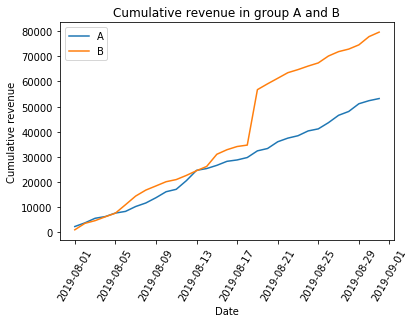

In [37]:
# Plotting the group A revenue graph 
plot = plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plot = plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.title('Cumulative revenue in group A and B')
plt.xticks(rotation = 60)


plt.legend() 
plt.show()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please fix the overlapping of the labels?
    
Please add the axis labels and the title to the graph.
This applies to all other graphs too.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent graph 👍👍👍
</div>

#### Conclusion

If we look at the increase in cumulative sales, we see that it is linear. In August 2018, however, a large jump can be seen in Group B. This is possibly an anomaly due to an extreme value.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, the spike can be due to large orders.
</div>

### Cumulative average order size by group

In [38]:
cumulativeData['average_order_size'] = cumulativeData.revenue / cumulativeData.orders
cumulativeData.head(6)

,date,group,orders,revenue,visitors,average_order_size
0,2019-08-01,A,23,2266.599854,19,98.547820
1,2019-08-01,B,17,967.199951,17,56.894115
2,2019-08-02,A,42,3734.899902,36,88.926188
3,2019-08-02,B,40,3535.300293,39,88.382507
4,2019-08-03,A,66,5550.100098,60,84.092426
5,2019-08-03,B,54,4606.899902,53,85.312961


#### Graph

In [39]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeAverageOrderSizeA = cumulativeData[cumulativeData['group']=='A'][['date','average_order_size']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeAverageOrderSizeB = cumulativeData[cumulativeData['group']=='B'][['date','average_order_size']]

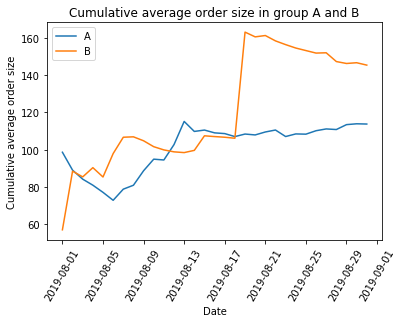

In [40]:
# Plotting the group A revenue graph 
plt.plot(cumulativeAverageOrderSizeA['date'], cumulativeAverageOrderSizeA['average_order_size'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeAverageOrderSizeB['date'], cumulativeAverageOrderSizeB['average_order_size'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative average order size')
plt.title('Cumulative average order size in group A and B')
plt.xticks(rotation = 60)

plt.legend() 
plt.show()

#### Conclusion

It can be seen that the cumulative average of the order size is subject to a large variation at the beginning of the record. This becomes smaller and smaller over time, as is to be expected. Likewise, a clear jump can be seen, which probably arose from an extreme value. In group A, the average order size approaches 120. With B, it is not yet possible to say this because of the jump in where the average order size will settle.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent graph analysis 👍👍👍
</div>

### Relative relative difference in cumulative average order size for group B compared with group A

#### Graph

In [41]:
cumulativeRevenueA.head(3)

,date,revenue,orders
0,2019-08-01,2266.599854,23
2,2019-08-02,3734.899902,42
4,2019-08-03,5550.100098,66


In [42]:
cumulativeRevenueB.head(3)

,date,revenue,orders
1,2019-08-01,967.199951,17
3,2019-08-02,3535.300293,40
5,2019-08-03,4606.899902,54


In [43]:
cumulativeData.head(4)

,date,group,orders,revenue,visitors,average_order_size
0,2019-08-01,A,23,2266.599854,19,98.547820
1,2019-08-01,B,17,967.199951,17,56.894115
2,2019-08-02,A,42,3734.899902,36,88.926188
3,2019-08-02,B,40,3535.300293,39,88.382507


In [44]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.599854,23,967.199951,17
1,2019-08-02,3734.899902,42,3535.300293,40
2,2019-08-03,5550.100098,66,4606.899902,54
3,2019-08-04,6225.600098,77,6138.500000,68
4,2019-08-05,7623.600098,99,7587.800293,89


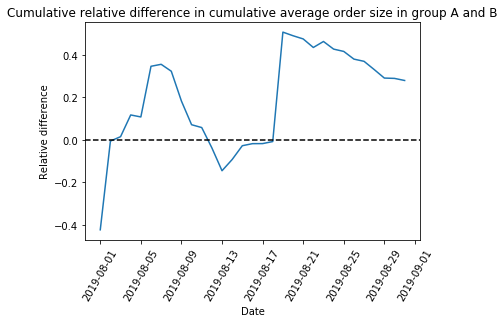

In [45]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Date')
plt.ylabel('Relative difference')
plt.title('Cumulative relative difference in cumulative average order size in group A and B')
plt.xticks(rotation = 60)

plt.show()

#### Conclusion

The ratio of cumulative sales of groups A and B is also very much influenced by the jump.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we have a fluctuations.
</div>

### Conversion rate as the ratio of orders to the number of visits

In [46]:
# calculating cumulative conversion
cumulativeData['conversion'] =cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head(6)

,date,group,orders,revenue,visitors,average_order_size,conversion
0,2019-08-01,A,23,2266.599854,19,98.547820,1.210526
1,2019-08-01,B,17,967.199951,17,56.894115,1.000000
2,2019-08-02,A,42,3734.899902,36,88.926188,1.166667
3,2019-08-02,B,40,3535.300293,39,88.382507,1.025641
4,2019-08-03,A,66,5550.100098,60,84.092426,1.100000
5,2019-08-03,B,54,4606.899902,53,85.312961,1.018868


In [47]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
print(cumulativeDataA.head(3))
# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
print(cumulativeDataB.head(3))

        date group  orders      revenue  visitors  average_order_size  \
0 2019-08-01     A      23  2266.599854        19           98.547820   
2 2019-08-02     A      42  3734.899902        36           88.926188   
4 2019-08-03     A      66  5550.100098        60           84.092426   

   conversion  
0    1.210526  
2    1.166667  
4    1.100000  
        date group  orders      revenue  visitors  average_order_size  \
1 2019-08-01     B      17   967.199951        17           56.894115   
3 2019-08-02     B      40  3535.300293        39           88.382507   
5 2019-08-03     B      54  4606.899902        53           85.312961   

   conversion  
1    1.000000  
3    1.025641  
5    1.018868  


In [48]:
cumulativeDataA.conversion.mean()

1.0714592584243636

In [49]:
cumulativeDataB.conversion.mean()

1.025487712026711

#### Graph

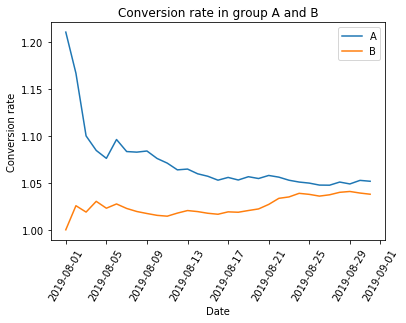

In [50]:
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.title('Conversion rate in group A and B')
plt.xticks(rotation = 60)

plt.show()


#### Conclusion

In the conversation rate, group A was always ahead. However, the more time passes, the more the conversation rates converge.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check this graph? Group B seems to be a leader.
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b>I'm afraid I don't quite understand what you mean here. A has a better conversion rate than B.</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Please note that conversation rate for group B higher than for group A, so please fix this error in the graph.
</div>

<div class="alert alert-info"> <b>Student's comment v. 2: </b>Why should the conversion rate at B be greater? Where did I make a mistake in the calculations? Unfortunately, I can't find an error.</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
Could you please check the correctness of the cumulativeData?
</div>

<div class="alert alert-info"> <b>Student's comment v. 3: </b>I corrected the step of the cumulativeData.. The results didn't change</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 4:
    
Yes, the formula for concversion is ok. Please check mergedCumulativeRevenue.
</div>

<div class="alert alert-info"> <b>Student's comment v. 4: </b>I am now very confused. "mergedCumulativeRevenue" has nothing to do with this task. Is the conversion part correct or not? Please tell me the cell where I make a mistake. Is it the creation of "mergedCumulativeRevenue" or how it is used?</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 5:
    
Unfortunately the conversion rate is calculated with errors. I have checked merge of data and it's correct... But the error is here :(
</div>

### Number of orders per user

In [51]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400000,B
1,2804400009,3642806036,2019-08-15,15.200000,B
3,3797467345,1196621759,2019-08-15,155.100006,B
4,2282983706,2322279887,2019-08-15,40.500000,B
5,182168103,935554773,2019-08-15,35.000000,B


In [52]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


#### Graph

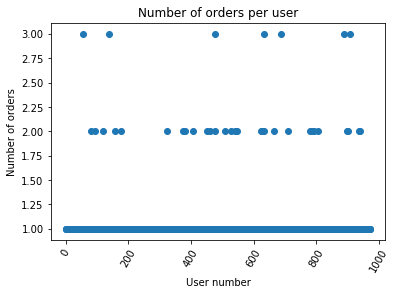

In [53]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('User number')
plt.ylabel('Number of orders')
plt.title('Number of orders per user')
plt.xticks(rotation = 60)

plt.show()

The number of orders per user ranges from 1 to 3, with 1 being very common and 2 and 3 being rare. There are no extreme values that influence the results.

#### Conclusion

### 95th and 99th percentiles for the number of orders per user

#### Graph

In [54]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Excellent, the 90th, 95th and 99th percentiles of the number of orders per user were calculated correctly.
</div>

#### Conclusion

The percentiles also show that the vast majority of users place only one order. Less than 1% of users have ordered 2 or 3 times.Since very few have placed 3 orders, 3 is considered an extreme value.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please define the point at which a data point becomes an anomaly?
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b> 3 orders per user does not seem to me to be an anomaly. If I'm wrong, I'll change that next time.</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Please note that 3 orders per user can be considered as an anomaly. There is no clear border, but it's necessary to choose boundary (one value of number of orders per user).
</div>

<div class="alert alert-info"> <b>Student's comment v. 2: </b> I added the step filtering Users with many orders (3)</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Ok :)
</div>

### Scatter chart of order prices

In [55]:
revenuesByUsers = (
    orders.drop(['group', 'date'], axis=1)
    .groupby('transactionId', as_index=False)
    .agg({'revenue': pd.Series.sum})
)


print(revenuesByUsers.head(10))

   transactionId     revenue
0        1062393  100.800003
1        4919758   40.200001
2        7210578   60.500000
3        8131427   75.500000
4       11068804   75.699997
5       19446369   55.200001
6       19467429   45.500000
7       26423654   30.799999
8       29438557   55.400002
9       31060183   15.400000


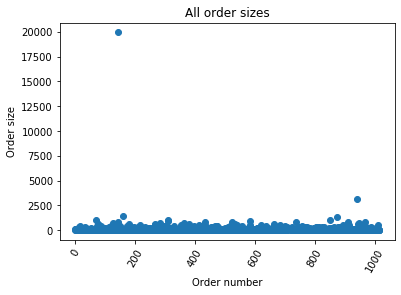

In [56]:
x_values = pd.Series(range(0,len(revenuesByUsers)))

plt.scatter(x_values, revenuesByUsers['revenue']) 

plt.xlabel('Order number')
plt.ylabel('Order size')
plt.title('All order sizes')
plt.xticks(rotation = 60)

plt.show()

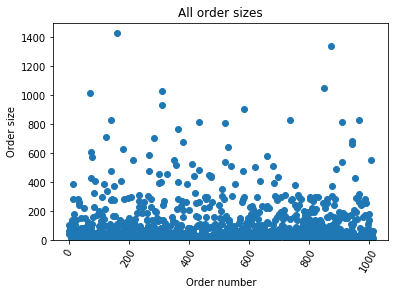

In [57]:
x_values = pd.Series(range(0,len(revenuesByUsers)))

plt.scatter(x_values, revenuesByUsers['revenue']) 
plt.ylim(0, 1500)

plt.xlabel('Order number')
plt.ylabel('Order size')
plt.title('All order sizes')
plt.xticks(rotation = 60)

plt.show()

#### Graph

#### Conclusion

In the two scatter plots above, you can see that the vast majority of orders have a value below 200. Few orders are in the range of 1000 and more. There are 2 extreme values that clearly stand out: One order for about 2500 and one for 20000. The latter is probably responsible for the jumps in the graphs.

### 95th and 99th percentiles of order prices

In [58]:
print(np.percentile(revenuesByUsers['revenue'], [90, 95, 99])) 

[280.79998779 414.27500153 830.29998779]


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you calulated more percentiles than specified in the task.
</div>

#### Graph

#### Conclusion

Percentiles show that less than 1% of orders are greater than 830. 90% of the orders have a value below 280. I set the anomaly threshold to an order greater than 2500. 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please choose the value of order prices which can be considered as boundary for an anomaly.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we can consider prices over $2500 as an outliers.
</div>

### Statistical significance of the difference in conversion between the groups using the raw data

#### Hypothesis test

Null hypothesis: "There is no statistically significant difference in conversion between the groups."
Alternative hypothesis: "Group B has a statistically significantly higher conversion rate."

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null hypothesis, but please add the alternative one.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Hypotheses formulation is correct :)
</div>

In [59]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400000,B
1,2804400009,3642806036,2019-08-15,15.200000,B
3,3797467345,1196621759,2019-08-15,155.100006,B
4,2282983706,2322279887,2019-08-15,40.500000,B
5,182168103,935554773,2019-08-15,35.000000,B


In [60]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']


ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

print(ordersByUsersA.head())
print(ordersByUsersB.head())


   visitorId  orders
0   11685486       1
1   54447517       1
2   66685450       1
3   78758296       1
4   85103373       1
1


In [61]:
print("{0:.3f}".format(stats.mannwhitneyu(ordersByUsersA.orders, ordersByUsersB.orders)[1]))
print("{0:.3f}".format(ordersByUsersB.orders.mean()/ordersByUsersA.orders.mean()-1)) 

0.294
-0.013


#### Conclusion

Based on the raw data, there is no difference between groups A and B.
The first line of the output gives us the p-value, 0.294, which is greater than 0.05. So we cannot reject the null hypothesis that there is no statistically significant difference in conversion between the groups. But the relative loss of group B is 1.3%.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check this statistical test.
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b> Unfortunately, I do not see any error. Can you give me a hint?</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
I suppose that the error in data. Please check fix graph for conversion at first.
</div>

<div class="alert alert-info"> <b>Student's comment v3: </b>"Please check fix graph for conversion at first." What do you mean wi</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 4:
    
It looks like the problem in data for concversion...
</div>

<div class="alert alert-info"> <b>Student's comment v. 4: </b>I'm sorry, but I can't do anything with this information. Please tell me the specific cell in which I am making a mistake. </div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 5:
    
Unfortunately the conversion rate is calculated with errors. I have checked merge of data and it's correct... But the error is here :(
</div>

In [62]:
len(ordersByUsersA)

445

In [63]:
len(ordersByUsersB)

528

In [64]:
ordersByUsersA.sample(20)

,visitorId,orders
21,248503091,1
136,1294108251,1
301,2888793654,1
432,4134011281,1
227,2232111114,2
271,2666068032,1
311,2993711540,1
208,2069923923,1
47,467975735,1
20,238992583,1


In [65]:
ordersByUsersB.sample(20)

,visitorId,orders
146,1197745035,1
497,4009017467,1
291,2316833558,1
256,2025197455,2
479,3906435972,1
218,1703949673,1
391,3097512534,1
327,2572433473,1
236,1826431635,1
56,428219747,1


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
I recommend to check samples for the statistical test.
</div>

<div class="alert alert-info"> <b>Student's comment v. 2: </b> Unfortunately, I do not see any error. Can you give me a hint?</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
Could you please check the correctness of data?
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 5:
    
Unfortunately the conversion rate is calculated with errors. I have checked merge of data and it's correct... But the error is here :(
</div>

### Statistical significance of the difference in average order size between the groups using the raw data

#### Hypothesis test

Null hypothesis: "There is no statistically significant difference average order size differs between the groups."
Alternative hypothesis: "Group B has a statistically significantly higher average order size."

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add the alternative hypothesis.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, a correct hypotheses.
</div>

In [66]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
0.278


#### Conclusion

The p-value is 0.43 and so considerably higher than 0.05. There's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is much bigger than it is for group A (+27.8%).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, there is no a statistical significant difference in average order size.
</div>

### Statistical significance of the difference in conversion between the groups using the filtered data

Here the extreme values of the turnover column are to be removed. All order sizes above 2500 are considered as extreme values. A significance test is then performed on the filtered data.

#### Filtering the data

In [67]:
# filtering users with many orders
groupedByVisitor = orders.groupby('visitorId').agg({'transactionId': 'nunique'})
usersWithManyOrders = groupedByVisitor.loc[groupedByVisitor.transactionId==3].index
usersWithManyOrders

Int64Index([ 249864742,  611059232, 2108163459, 2742574263, 2988190573,
            3908431265, 3967698036],
           dtype='int64', name='visitorId')

In [68]:
# filtering users with expensive orders

usersWithExpensiveOrders = orders[orders['revenue'] > 2500]['visitorId']
usersWithExpensiveOrders

425     1920142716
1196    2108080724
Name: visitorId, dtype: int64

In [69]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400000,B
1,2804400009,3642806036,2019-08-15,15.200000,B
3,3797467345,1196621759,2019-08-15,155.100006,B
4,2282983706,2322279887,2019-08-15,40.500000,B
5,182168103,935554773,2019-08-15,35.000000,B


In [70]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(usersWithExpensiveOrders)|ordersByUsersA['visitorId'].isin(usersWithManyOrders))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitorId'].count() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(usersWithExpensiveOrders)|ordersByUsersA['visitorId'].isin(usersWithManyOrders))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitorId'].count() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

sampleAFiltered

0     1
1     1
2     1
3     1
4     1
     ..
18    0
19    0
20    0
21    0
22    0
Name: orders, Length: 463, dtype: int64

<div class="alert alert-info"> <b>Student's comment v. 2: </b> I added the step filtering Users with many orders (3)</div>

#### Hypothesis test

Null hypothesis: "There is no statistically significant difference in conversion between the groups."

In [71]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleBFiltered, sampleAFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.147
0.022


#### Conclusion

Based on the filtered data, there is still no difference between groups A and B.
The first line of the output gives us the p-value, 0.348, which is greater than 0.05. So we cannot reject the null hypothesis that there is no statistically significant difference in conversion between the groups. The filtered data has the same average conversion rate.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check it.
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b> Could you give me a hint?</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Please check samples and conditions.
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 5:
    
Unfortunately the conversion rate is calculated with errors. I have checked merge of data and it's correct... But the error is here :(
</div>

### Statistical significance of the difference in average order size between the groups using the filtered data

#### Hypothesis test

Null hypothesis: "There is no statistically significant difference average order size differs between the groups."

In [72]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'].mean() - 1)) 

0.392
-0.088


#### Conclusion

The p-value is 0.39 and so considerably higher than 0.05. There's still no reason to reject the null hypothesis and conclude that average order size differs between the groups. After filtering the data, we find that the average order sizes differ much less than before (8.8% difference instead of 27.8%).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we have the same result as for raw data.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please see additional materials: https://machinelearningmastery.com/statistical-hypothesis-tests/, https://www.isdscotland.org/About-ISD/Methodologies/_docs/Hypothesis-Testing-v0-4-2018-11-27.pdf 
</div>

## Overall conclusion and recommendation for a business decision.

From the calculations of ICE and RICE values, it appeared that the hypotheses "Adding a subscription form on all main pages" and "Adding two new channels to attract traffic" are the most important for the future success of the store. These strategies are especially helpful in generating new customers. Since the A/B tests also showed that most customers only order once, it is important to keep attracting new customers who will then place at least one order.
Other results of the A/B tests are that groups A and B differ significantly in the raw data in terms of cumulative sales, average order size and conversion rate. However, after filtering out the extreme values, the groups are very similar.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It will be better to describe all main results of the project.
</div>

<div class="alert alert-info"> <b>Student's comment v1: </b>I will improve the overall conclusion when my calculations are right :-)</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>